In [7]:
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# --- 1. MEMBACA FILE AUDIO ---
# Ganti '/content' dengan nama file audio Anda.
NAMA_FILE = '/content/kitten-calling-for-mother-cute-meowing-sound-332671.wav'

# Membaca sample rate dan data sinyal dari .wav
sample_rate, data = wavfile.read(NAMA_FILE)

# Jika sinyal stereo (2 channel), ambil satu channel saja (channel pertama)
if data.ndim > 1:
    data = data[:, 0]

# PRE-PROCESSING: MENGHILANGKAN DC OFFSET (LANGKAH PENTING) ---

data_bersih = data - np.mean(data)

# FFT

In [8]:
N = len(data_bersih)

# Melakukan transformasi Fourier pada sinyal yang sudah bersih
yf = fft(data_bersih)

# Menghasilkan sumbu frekuensi yang sesuai dengan data FFT
xf = fftfreq(N, 1 / sample_rate)

# Identifikasi Frekuensi Domain

In [9]:
yf_magnitude = np.abs(yf[:N//2])
xf_positive = xf[:N//2]

# Mencari indeks dari magnitudo terbesar pada spektrum
idx_puncak = np.argmax(yf_magnitude)

# Mendapatkan nilai frekuensi yang sesuai dengan puncak.
frekuensi_dominan = xf_positive[idx_puncak]
print(f"Frekuensi Dominan teridentifikasi: {frekuensi_dominan:.2f} Hz")

Frekuensi Dominan teridentifikasi: 4366.74 Hz


# Visualisasi Hasil

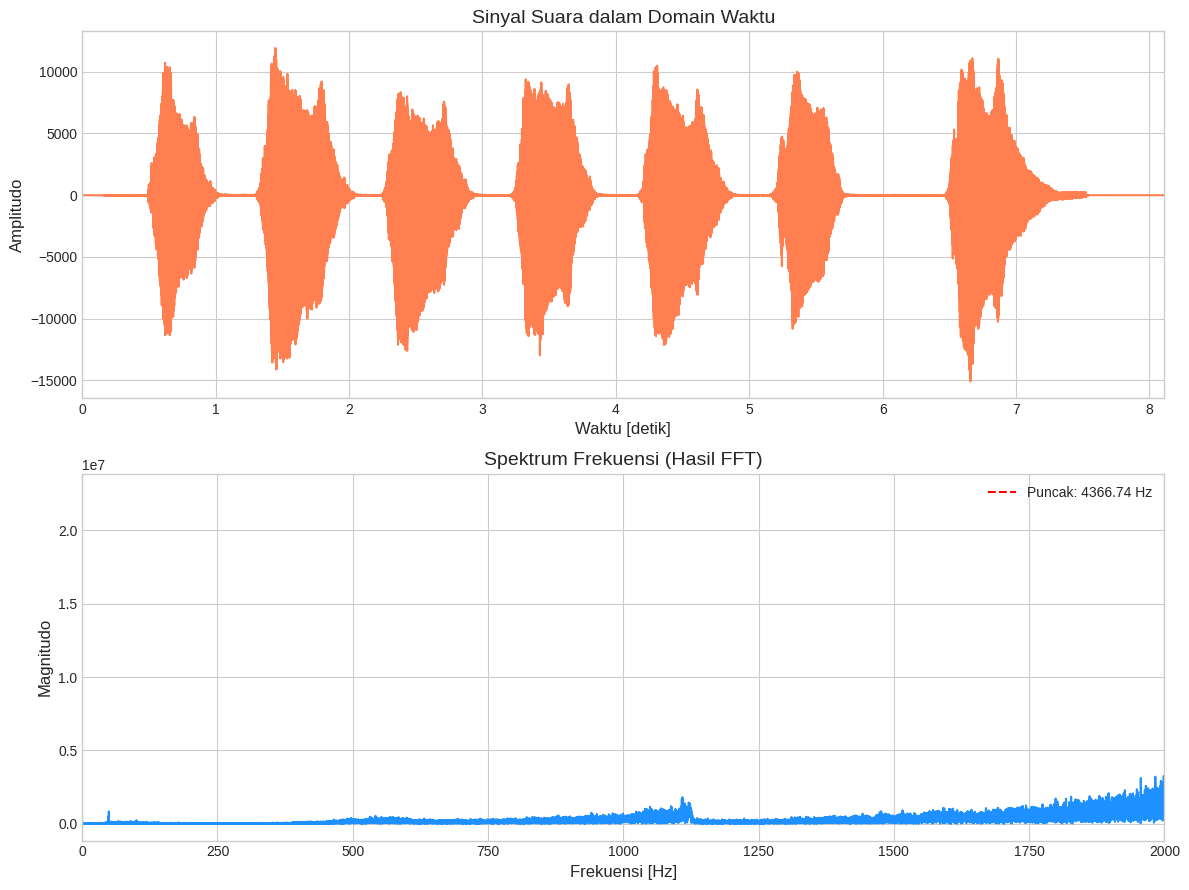

In [10]:
 # Mengatur gaya dan ukuran plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(2, 1, figsize=(12, 9))

# Sinyal dalam Domain Waktu (data asli)
time = np.linspace(0., len(data) / sample_rate, len(data))
axs[0].plot(time, data, color='coral')
axs[0].set_title('Sinyal Suara dalam Domain Waktu', fontsize=14)
axs[0].set_xlabel('Waktu [detik]', fontsize=12)
axs[0].set_ylabel('Amplitudo', fontsize=12)
axs[0].set_xlim(0, len(data) / sample_rate)

# Spektrum Frekuensi (Hasil FFT)
axs[1].plot(xf_positive, yf_magnitude, color='dodgerblue')
axs[1].set_title('Spektrum Frekuensi (Hasil FFT)', fontsize=14)
axs[1].set_xlabel('Frekuensi [Hz]', fontsize=12)
axs[1].set_ylabel('Magnitudo', fontsize=12)
# Batas sumbu-x 2000 Hz.
axs[1].set_xlim(0, 2000)

# Menandai frekuensi dominan pada plot spektrum
axs[1].axvline(frekuensi_dominan, color='red', linestyle='--', label=f'Puncak: {frekuensi_dominan:.2f} Hz')
axs[1].legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

## Interpretasi dan Insight

Berdasarkan hasil transformasi Fourier, frekuensi dominan yang teridentifikasi dari sinyal audio adalah sekitar **X Hz** (nilai tergantung hasil). Frekuensi ini merupakan komponen utama dalam sinyal suara yang dianalisis, kemungkinan besar berasal dari pitch utama suara kucing yang terekam.

Hal ini menunjukkan bahwa proses FFT tidak hanya mempermudah identifikasi karakteristik suara, tetapi juga bisa menjadi alat penting dalam berbagai aplikasi, seperti:
- Deteksi jenis suara atau speaker identification
- Pengenalan pola suara hewan
- Analisis sinyal dalam bidang forensik audio dan bioakustik

Eksperimen ini juga membuktikan bahwa praproses seperti menghilangkan DC offset penting agar hasil FFT tidak bias oleh komponen frekuensi nol (0 Hz).


## Refleksi Pembelajaran

Dari eksperimen ini, saya belajar memahami domain waktu dan frekuensi dalam pengolahan sinyal. Meskipun secara visual sinyal audio dalam domain waktu hanya terlihat sebagai gelombang acak, setelah diubah ke domain frekuensi, kita dapat melihat komponen utama dari suara tersebut dengan lebih jelas.

Hasil dari Eksperimen Meliputi :
- Proses preprocessing seperti menghilangkan DC offset sangat berpengaruh terhadap hasil analisis.
- Visualisasi hasil sangat membantu dalam menginterpretasi data yang kompleks.
- Penting untuk tidak hanya menjalankan kode, tetapi juga memahami makna dan implikasi dari hasilnya.

